In [0]:
! pip install py2neo
! pip install wikipedia

In [0]:
import wikipedia
import networkx as nx

### Collecting data and creating graph

In [0]:
links = []
def is_here(l):
    k = (l[1], l[0])
    for elem in links:
        if l == elem or k == elem:
            return 0
    return 1


def search(str, f):
    if f < 12:
        a = str.split()
        near = wikipedia.search(a)
        for elem in near:
            if is_here((elem, str)):    
                links.append((str, elem))
                search(elem, f + 1)
    
search('Lermontov', 0)

Кол-во вершин 2084
Кол-во ребер 5170


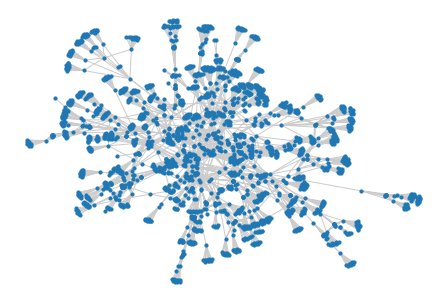

In [0]:
g = nx.Graph()
g.add_edges_from(links)
print("Кол-во вершин", g.number_of_nodes())
print("Кол-во ребер", g.number_of_edges())
nx.draw(g, node_size=10, edge_color='0.8')

### Moving data to the database

In [0]:
from py2neo import Node, Relationship, Graph

In [0]:
# the database is hosted on a neo4j sandbox
NEO4J_HOST = 'bolt://3.84.239.221:43153'
NEO4J_AUTH = ("neo4j", "housing-colds-bag")

graph = Graph(NEO4J_HOST, auth=NEO4J_AUTH)

In [0]:
LINKED = Relationship.type("LINKED")
for vertex, neighs in g.adj.items():
    for neigh in neighs:
        if vertex == neigh:
            continue
        v1 = Node('Article', name=vertex)
        v2 = Node('Article', name=neigh)
        graph.merge(LINKED(v1, v2), 'Article', 'name')